<a href="https://colab.research.google.com/github/dipteshh/ml-learn/blob/main/linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [54]:
companies = pd.read_csv('./1000_Companies.csv')
x=companies.iloc[:,:-1].values
y=companies.iloc[:,4].values

companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


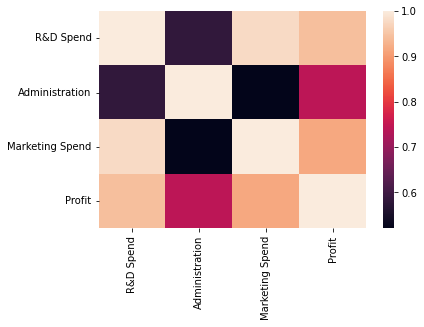

In [55]:
sns.heatmap(companies.corr())

In [56]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.compose import ColumnTransformer


labelencoder = LabelEncoder()
x[:,3]=labelencoder.fit_transform(x[:,3])

onehotencoder = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder = 'passthrough')
# onehotencoder = OneHotEncoder(categorical_features = [3])
x=onehotencoder.fit_transform(x)

print(x)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 ...
 [1.0 0.0 0.0 100275.47 241926.31 227142.82]
 [1.0 0.0 0.0 128456.23 321652.14 281692.32]
 [0.0 0.0 1.0 161181.72 270939.86 295442.17]]


In [57]:
x=x[:,1:]
print(x)

[[0.0 1.0 165349.2 136897.8 471784.1]
 [0.0 0.0 162597.7 151377.59 443898.53]
 [1.0 0.0 153441.51 101145.55 407934.54]
 ...
 [0.0 0.0 100275.47 241926.31 227142.82]
 [0.0 0.0 128456.23 321652.14 281692.32]
 [0.0 1.0 161181.72 270939.86 295442.17]]


In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [59]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [60]:
y_pred = reg.predict(x_test)
y_pred

array([ 89790.61532915,  88427.07187361,  94894.67836971, 175680.86725611,
        83411.73042088, 110571.90200074, 132145.2293644 ,  91473.37719686,
       164597.05380607,  53222.826674  ,  66950.19050989, 150566.43987005,
       126915.20858596,  59337.85971049, 177513.91053062,  75316.28143051,
       118248.14406603, 164574.40699902, 170937.2898107 , 182069.11645085,
       118845.03252689,  85669.95112228, 180992.59396144,  84145.08220144,
       105005.83769214, 101233.56772746,  53831.0766909 ,  56881.41475223,
        68896.39346904, 210040.00765884, 120778.72270894, 111724.87157654,
       101487.90541517, 137959.02649624,  63969.95996743, 108857.91214126,
       186014.72531988, 171442.64130748, 174644.26529205, 117671.49128195,
        96731.37857433, 165452.2577941 , 107724.34331255,  50194.54176912,
       116513.89532179,  58632.4898682 , 158416.4682761 ,  78541.48521609,
       159727.66671744, 131137.87699644, 184880.70924517, 174609.0826688 ,
        93745.66352059,  

In [61]:
print(reg.coef_)

[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]


In [62]:
print(reg.intercept_)

-51035.22972404538


In [63]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9112695892268894